In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# Tạo dữ liệu mẫu
X = torch.rand(1000, 2)
y = (X[:, 0] + X[:, 1] > 1).float().unsqueeze(1)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [3]:
# Định nghĩa mô hình
class ANN(nn.Module):
    def __init__(self, hidden_size=4):
        super(ANN, self).__init__()
        self.hidden = nn.Linear(2, hidden_size)
        self.output = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        return self.output(x)  # Không dùng Sigmoid khi dùng BCEWithLogitsLoss

In [4]:
# Hàm huấn luyện
def train_model(loss_fn, optimizer_fn, hidden_size=4, use_logits_loss=False):
    model = ANN(hidden_size)
    optimizer = optimizer_fn(model.parameters(), lr=0.01)
    loss_function = loss_fn()
    loss_history = []
    
    for epoch in range(100):
        epoch_loss = 0
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            output = model(batch_X)
            if use_logits_loss:
                loss = loss_function(output, batch_y)
            else:
                loss = loss_function(torch.sigmoid(output), batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        loss_history.append(epoch_loss / len(dataloader))
    
    # Tính mất mát và độ chính xác cuối cùng
    with torch.no_grad():
        preds = torch.sigmoid(model(X)) > 0.5
        accuracy = (preds == y).float().mean().item()
    
    return loss_history, accuracy

In [5]:
# Huấn luyện với 3 cấu trúc
loss_2_4_1_adam, acc_2_4_1_adam = train_model(nn.BCELoss, optim.Adam, hidden_size=4, use_logits_loss=False)
loss_2_8_1_adam, acc_2_8_1_adam = train_model(nn.BCELoss, optim.Adam, hidden_size=8, use_logits_loss=False)
loss_2_4_1_sgd, acc_2_4_1_sgd = train_model(nn.BCELoss, optim.SGD, hidden_size=4, use_logits_loss=False)

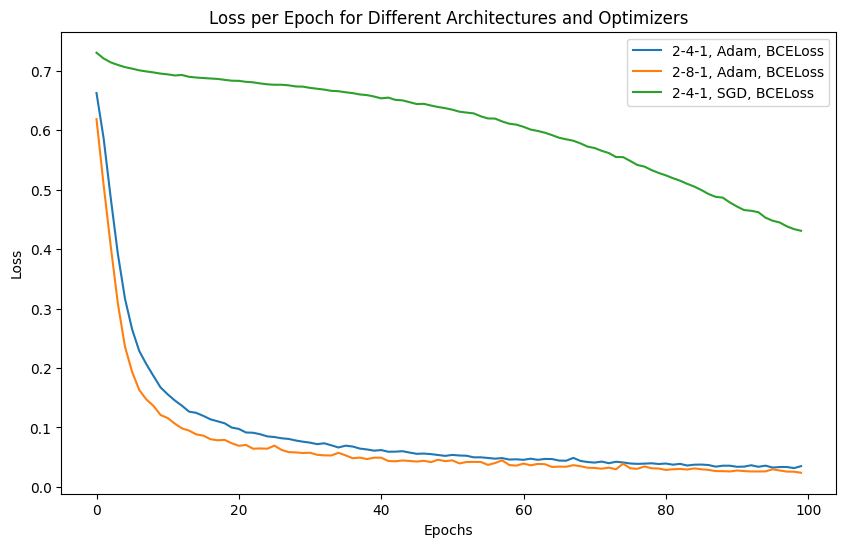

In [6]:
# Vẽ đồ thị mất mát
plt.figure(figsize=(10, 6))
plt.plot(loss_2_4_1_adam, label='2-4-1, Adam, BCELoss')
plt.plot(loss_2_8_1_adam, label='2-8-1, Adam, BCELoss')
plt.plot(loss_2_4_1_sgd, label='2-4-1, SGD, BCELoss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch for Different Architectures and Optimizers')
plt.legend()
plt.show()

## Câu hỏi:

**Quan sát đồ thị :**

**1. Mất mát giảm nhanh nhất ở trường hợp '2-8-1, Adam, BCELoss'. Điều này có thể do mạng có nhiều nơ-ron hơn giúp học đặc trưng tốt hơn.**

**2. Mất mát giảm chậm nhất ở trường hợp '2-4-1, SGD, BCELoss'. SGD thường có tốc độ hội tụ chậm hơn so với Adam.**

**3. Đường mất mát của SGD không giảm đều mà dao động khá nhiều. Điều này là do SGD cập nhật trọng số bằng gradient của từng batch, dẫn đến biến động lớn hơn.**